<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool10_DataAnalysis/blob/main/DATA09_%EC%9D%B4%EC%83%81%EC%B9%98(Anomaly).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 이상치 

>## 1) 이상치란
>- 일반적인 패턴 및 동향 벗어난 값
>- 데이터수집 오류, 자연적 이벤트 등으로 발생
>- 데이터 분석 및 예측에 부정적 영향 미칠 수 있음

>## 2) 이상치 탐지의 중요성 / 활용성
>- 데이터품질향상
>- 모델 정확성 향상
>- 이상패턴 탐지
>- 비즈니스응용
>- 데이터 이상치 원인분석

# 2. 데이터 이상치 탐지방법

>## 1) 이동평균 및 이동표준편차
>- 이동평균, 이동표준편차 윈도우 크기 및 임계값 설정에 따라 이상치 탐지여부 달라질 수 있음
>- 추세와 변동성에 따라 달라질 수 있어 특성 고려해야 함

>>### (1) 확인 순서
>>- 이동평균계산(추세) : 데이터포인트 이전 N개 포인트의 평균을 계산하여 데이터 전반적 추세 파악
>>- 이동표준편차계산(변동성) : 데이터 N개 포인트 표준편차 계산하여 변동성 파악
>>- 임계값 설정 : (이동평균*배수)+(이동표준편차+배수)
>>- 이상치 탐지 : 임계값 사용하여 데이터 포인트가 이상치인지 여부 판별

>>### (2) 실습
>>- 윈도우크기 7로 설정 : 일주일 계산

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

#데이터 프레임 생성
data  = pd.DataFrame({'Date':dates, 'Value':values})

#이동평균 / 이동표준편차 계산
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()
print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.520013
7      0.558687
8      0.511372
9      0.496353
10     0.212575
11     0.179493
12     0.247507
13    -0.251421
14    -0.607471
15    -0.620730
16    -0.842929
17    -0.731834
18    -0.795019
19    -1.031342
20    -0.548638
21    -0.334475
22    -0.244502
23    -0.303347
24    -0.426008
25    -0.280444
26    -0.243114
27    -0.398822
28    -0.452373
29    -0.503691
30    -0.386114
31    -0.043733
32    -0.061508
33    -0.048182
34     0.015654
35    -0.072947
36    -0.001439
37    -0.195434
38    -0.649786
39    -0.619734
40    -0.363138
41    -0.456163
42    -0.298278
43    -0.371130
44    -0.302395
45    -0.215489
46    -0.309417
47    -0.263895
48    -0.239288
49    -0.474630
50    -0.385317
51    -0.229112
52    -0.222980
53    -0.069792
54    -0.073524
55     0.010428
56     0.142403
57     0.051932
58     0.154267
59     0.390334
60     0.234498
61     0.060689
62    -0

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

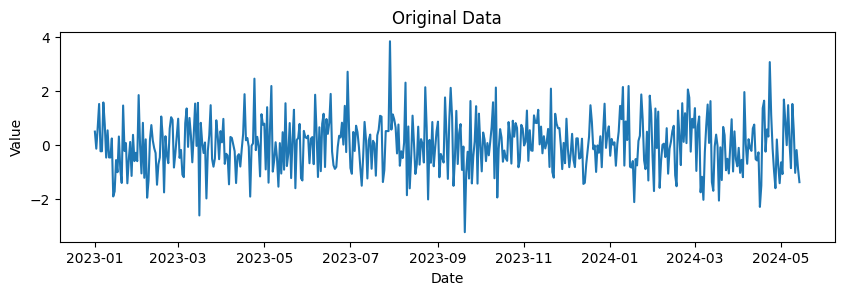

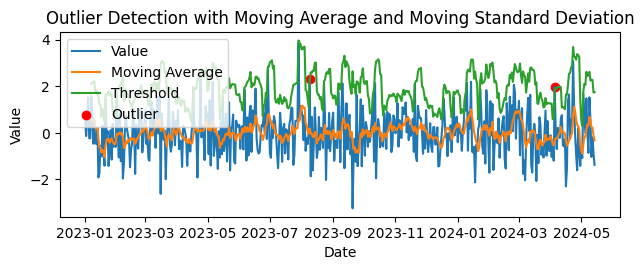

In [5]:
#임계값 설정
threshold_multiplier = 2  #임계값배수
data['Threshold'] = data['MovingAverage'] + threshold_multiplier * data['MovingStd']

#이상치 탐지
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'])

# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')
plt.show()

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')

plt.legend()
plt.tight_layout()

>## 2) 지수평활법
>- 추세 및 계절성 고려해 데이터를 부드럽게 추정하는 방법
>- 최근값에 높은 가중치, 과거값에 감소하는 가중치 부여

>>### (1) 확인순서
>>- 시계열 데이터에 대해 지수평활법 모델 적용
>>- 추세(Trend)추정 및 전차(Residual) 계산
>>- 전차가 임계값 초과하는 경우 이를 이상치로 판단

>>### (2) 실습

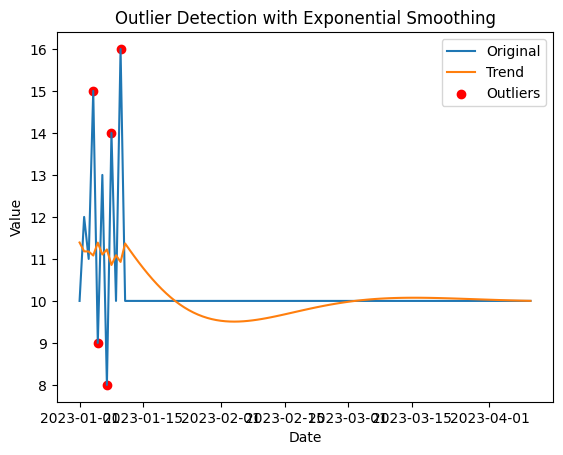

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16]+[10]*90  #이상치 포함된 데이터

#데이터프레임생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#지수평활법 모델학습
model = ExponentialSmoothing(data['Value'], trend='add')    #선형적추세가정
model_fit = model.fit()

#추세계산
trend = model_fit.predict(start=0, end=len(data['Value'])-1)

#추세에서의 편차계산
deviation = data['Value'] - trend

#이상치탐지
threshold = 2   #이상치임계값설정
outliers = abs(deviation) > threshold

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()
plt.show()

>## 3) Z-점수
>- 데이터 평균/표준편차 활용하여 탐지 
>- Z점수(포인터와 평균 사이의 거리) 계산해서 이상치 판단
>- Z점수 : 임계값보다 크면 해당포인트 이상치로 간주

>>### (1) 확인순서
>- 시계열 데이터 생성
>- 평균 및 표준편차 계산
>- Z-점수 계산
>- 이상치 탐지
>- 이상치 처리

>>### (2) 실습

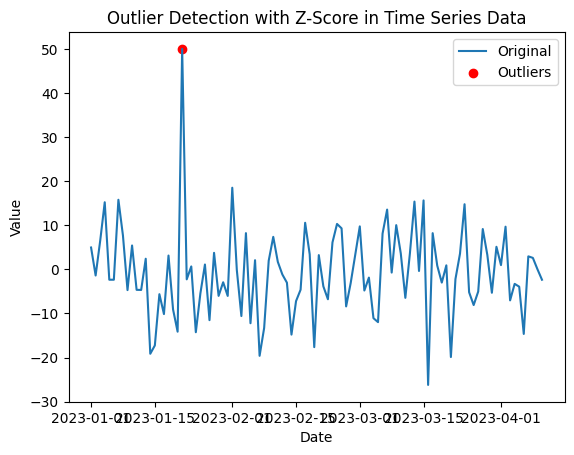

Detected Outliers:
20    50.0
Name: Value, dtype: float64


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)*10    #정규분포 따르는 데이터 생성

#이상치 추가
values[20] = 50   #이상치 추가

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#이상치탐지
z_scores = np.abs(stats.zscore(data['Value']))  #z-score계산
threshold = 3   #이상치 임계값 설정
outliers = z_scores > threshold   #z-score가 임계값 초과하는지 확인

# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)

>## 4) 스무딩
>- 시계열데이터에서 이상치를 완화시키는 기법
>- 데이터 추세/패턴을 부드럽게 만들어주는 과정
>- 이동평균, 지수평활법 사용하여 완화시킴

>>### (1) 확인순서
>- 이동평균 : 일정기간 관측값을 평균하여 새로운 데이터포인트 생성
>- 지수평활법 : 가중평균 사용하여 현재값일수록 더 높은 가중치주는 방식으로 부드럽게 만듦
>- 둘중 하나 선택해서 진행

>>### (2) 실습 - 시계열 데이터 시각화

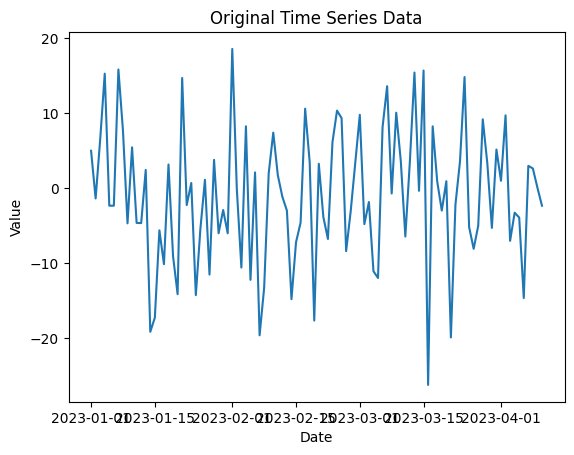

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열데이터생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10  #정규분포따르는 데이터 생성

#데이터생성
data=pd.DataFrame({'Date':dates, 'Value':values})

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.show()

>>### (3) 실습 - 이동평균

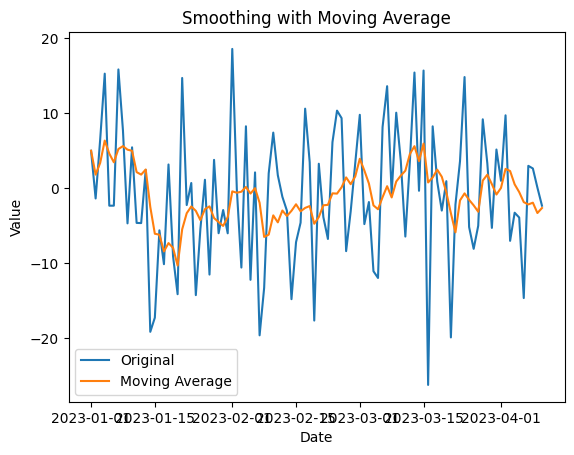

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열데이터생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10  #정규분포따르는 데이터 생성

#데이터생성
data=pd.DataFrame({'Date':dates, 'Value':values})

#이동평균 사용한 스무딩 
window_size = 7   #이동평균 윈도우 크기 설정

#이동평균 계산
data['MovingAverage'] = data['Value'].rolling(window=window_size, min_periods=1).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Moving Average')
plt.legend()
plt.show()

>>### (4) 실습 - 지수평활

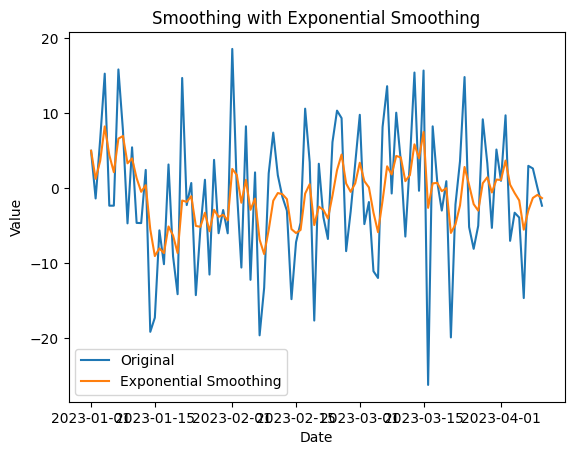

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열데이터생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10  #정규분포따르는 데이터 생성

#데이터생성
data=pd.DataFrame({'Date':dates, 'Value':values})

#지수평활법 사용한 스무딩 
alpha = 0.3   #지수평활법 평활계수 설정

#지수평활법 계산
data['ExponentialSmoothing'] = data['Value'].ewm(alpha=alpha).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['ExponentialSmoothing'], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponential Smoothing')
plt.legend()
plt.show()

>## 5) 트렌드
>- 트렌드 : 데이터의 추세
>- 상향/하향/수평 트렌드 이용

>>### (1) 실습
>>- 1주일 단위 반복 및 상승 추세 보임

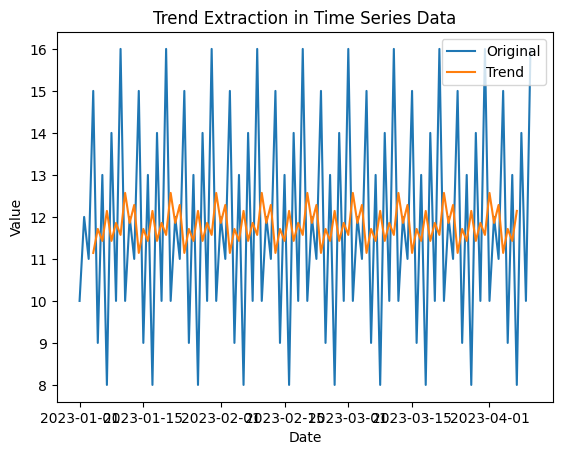

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#시계열데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16]*10  #시계열데이터

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#주기설정
period=7  #7일주기

#주기성 분해
result = seasonal_decompose(data['Value'], model='additive', period=period)

#추세계산 
trend = result.trend

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend Extraction in Time Series Data')
plt.legend()
plt.show()

# 3.이상치 처리의 한계 및 제약사항

>## 1) 이상치 처리 한계
>- 이상지 정의의 주관성 : 상황에 따라 이상치가 다르게 정의될 수 있음
>- 이상치 감지 및 탐지의 의 어려움 : 예측하기 어려울 때 있음
>- 이상치 처리의 영향 : 데이터 특성 변경 가능성

>## 2) 이상치 처리 제약사항
>- 시계열 데이터의 복잡성
>- 대량 데이터 처리의 어려움
>- 이상치 탐지의 어려움

>## 3) 시계열 데이터에서 이상치 탐지 및 처리 실습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)*10    #정규분포 따르는 데이터 생성

#이상치 추가
values[20] = 50   

#데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})
print("이상치 데이터 추가 확인 체크 >>", data['Value'].iloc[20])

이상치 데이터 추가 확인 체크 >> 50.0


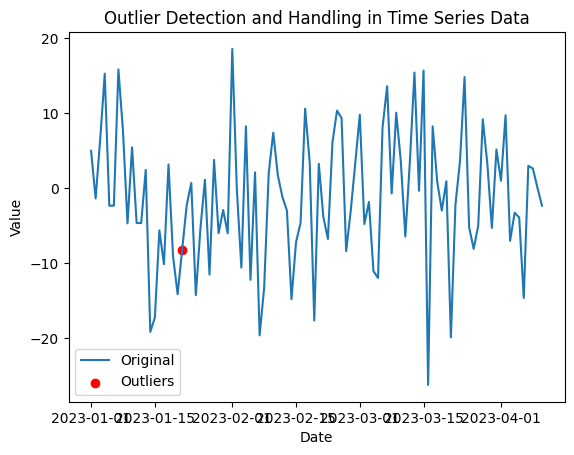

이상치 처리된 데이터 확인 >>  -8.190400009109137


In [3]:
#이상치 탐지
z_score = np.abs(stats.zscore(data['Value'])) #z-score계산
threshold = 3  #이상치임계값 설정
outliers = z_score > threshold  #z-score가 임계값 초과하는지 확인

#이상치 처리
data.loc[outliers, 'Value'] = np.nan  #이상치를 결측치로 처리

#결측치 보간
data['Value'] = data['Value'].interpolate()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.show()

# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> " , data['Value'].iloc[20])